In [1]:
import logging
from pathlib import Path

import numpy as np
import pandas as pd
import pyvista as pv

from amworkflow.geometry import GeometryCenterline
from amworkflow.meshing import MeshingGmsh

logging.basicConfig(level=logging.INFO)

%load_ext autoreload
%autoreload 2

2024-02-02 11:35:00,644 - root - INFO - point [0. 0. 0.] already exists, return the old one.


# Toy problem for demonstrating the moduls of the AM workflow repo

In [2]:
# initialze parameter dict
params = { }

# define output directory 
OUTPUT_NAME = "toy"
OUTPUT = (
    Path.cwd() / "output_notebook"
) 
OUTPUT.mkdir(parents=True, exist_ok=True)

print(f"result files will be saved in folder: {OUTPUT}")


result files will be saved in folder: /home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook


## 1. Create design by centerline

In [3]:
# set design parameters
params["layer_thickness"] = 10.  # mm
params["height"] = 40.  # mm

# define centerline by points (x,y,z) as list:
points = [[0., 0., 0.],
          [0.,150.,0.],
          [10.,150.,0],
          [75.,75.,0.],
          [140.,150.,0.],
          [150.,150.,0.],
          [150.,0.,0.]]
# points = [[0., 0., 0.],
#           [0.,150.,0.],
#           [150.,150.,0.],
#           [150.,0.,0.]]
params["points"] = points

# initialize geometry class
geometry = GeometryCenterline(**params)
# create stp, csv, stl
geometry.create(OUTPUT / f"{OUTPUT_NAME}.stp",  OUTPUT / f"{OUTPUT_NAME}.csv", OUTPUT / f"{OUTPUT_NAME}.stl")

0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
6 8
6 9
6 10
6 11
6 12
6 13
6 14
7 9
7 10
7 11
7 12
7 13
7 14
8 10
8 11
8 12
8 13
8 14
9 11
9 12
9 13
9 14
10 12
10 13
10 14
11 13
11 14
12 14
filtered: []
vote: [0. 0.]
result: [[0, 1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12, 13]]
[[0, 1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12, 13]]

*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 2                      ******
** WorkSession : Sending all data
 Step File Name : /home/araderma/Documents/03_codes/amworkflow/e

In [4]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

2024-02-02 11:35:04,881 - py.warnings - WARNING - /home/araderma/miniconda3/envs/amworkflow/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(



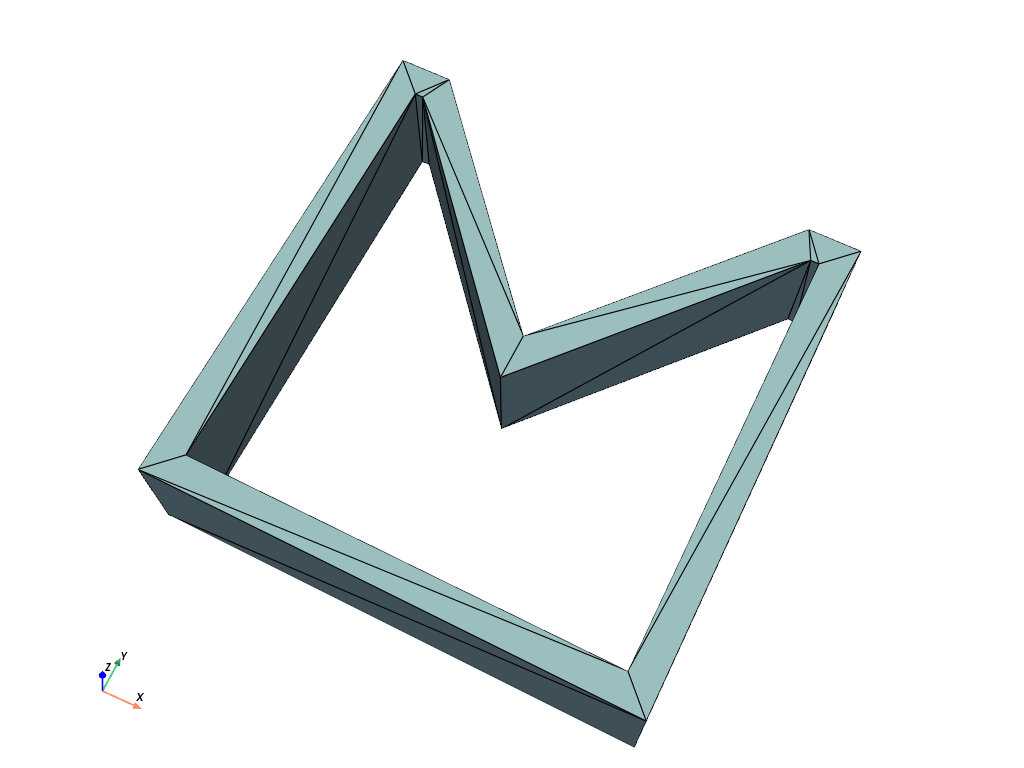

In [5]:
# display stl
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.stl")
#mesh.plot(cpos='xy')
mesh.plot(cpos=[1, -2, 5], show_edges=True)

In [6]:
# load saved points:
pd.read_csv(OUTPUT / f"{OUTPUT_NAME}.csv")

,Unnamed: 0,x,y,z
0,0,0.0,0.0,0.0
1,1,0.0,150.0,0.0
2,2,10.0,150.0,0.0
3,3,75.0,75.0,0.0
4,4,140.0,150.0,0.0
5,5,150.0,150.0,0.0
6,6,150.0,0.0,0.0


## 2. Create gcode from points

In [7]:
# define gcode parameters
#params[""]=...

In [8]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

## 3. Create mesh from design

In [12]:
# define mesh parameters
params["mesh_size_factor"] = 1
params["number_of_layers"] =  4

meshing = MeshingGmsh(**params)
meshing.create(OUTPUT / f"{OUTPUT_NAME}.stp",OUTPUT / f"{OUTPUT_NAME}.xdmf",OUTPUT / f"{OUTPUT_NAME}.vtk")

Info    : Meshing 3D...
Info    : 3D Meshing 8 volumes with 2 connected components
Info    : Tetrahedrizing 108 nodes...
Info    : Done tetrahedrizing 116 nodes (Wall 0.000705527s, CPU 0.000528s)
Info    : Reconstructing mesh...
Info    :  - Creating surface mesh
Info    :  - Identifying boundary edges
Info    :  - Recovering boundary
Info    : Done reconstructing mesh (Wall 0.00209763s, CPU 0.001868s)
Info    : Found volume 3
Info    : Found volume 1
Info    : Found volume 2
Info    : Found volume 4
Info    : It. 0 - 0 nodes created - worst tet radius 0.704788 (nodes removed 0 0)
Info    : 3D refinement terminated (108 nodes total):
Info    :  - 0 Delaunay cavities modified for star shapeness
Info    :  - 0 nodes could not be inserted
Info    :  - 272 tetrahedra created in 6.20475e-05 sec. (4383737 tets/s)
Info    : Tetrahedrizing 0 nodes...
Info    : Done tetrahedrizing 8 nodes (Wall 6.31176e-05s, CPU 6.1e-05s)
Info    : Reconstructing mesh...
Info    :  - Creating surface mesh
Info 

Error   : No elements in volume 5 6 7 8 


Exception: No elements in volume 5 6 7 8 

In [10]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

2024-02-02 11:35:28,220 - py.warnings - WARNING - /home/araderma/miniconda3/envs/amworkflow/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(



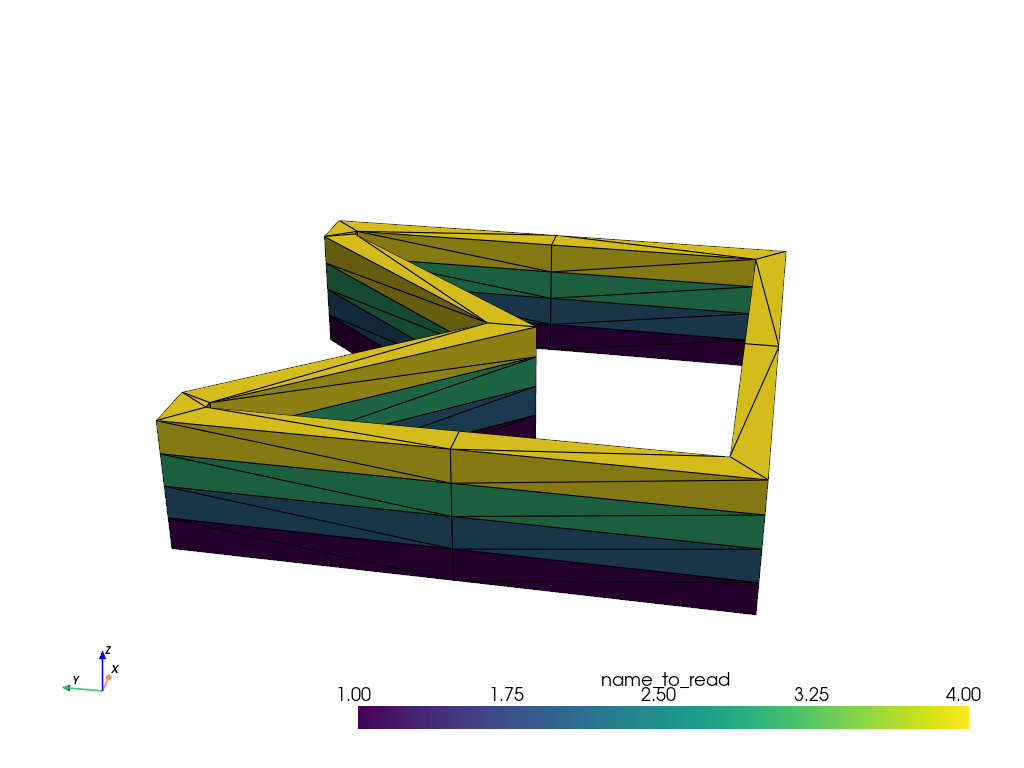

In [11]:
# display vtk
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.xdmf")
#mesh.plot(cpos='xz', show_edges=True)
mesh.plot(cpos=[-10, -2, 5], show_edges=True)

## 4. Run simulation